# Coffee Analysis

In [1]:
# import libraries

import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#### Data Import

In [3]:
coffee = pd.read_csv("../data/crop/coffee_output.csv")

#### Previewing the Dataset

In [4]:
coffee.head(5)


,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
1,Brazil,Espirito Santo,Arabica,2.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
2,Brazil,Espirito Santo,Robusta,7.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
3,Brazil,Sao Paulo,Arabica,3.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
4,Brazil,Parana,Arabica,0.5,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0


## Exploratory Data Analysis

#### Checking Dataset Dimensions

In [5]:
coffee.shape

(114, 11)

Coffee dataset contains 114 rows and 11 columns.

In [ ]:
coffee.columns  

Index(['country', 'subdivision', 'type', '60kgs_bag', 'year',
       'nonbearing_trees', 'bearing_trees', 'nonbear_hectares',
       'bearing_hectares', 'bearing_trees_per_hectare',
       'nonbearing_trees_per_hectare'],
      dtype='object')

* Country: Country where harvest occurs (all should be Brazil).
* subdivision: Name of sub-division (all should be Minais Gerais)
* type: Type of coffee bean
* 60kgs_bag: 60 kg bags of coffee beans harvested (million bags)
* year: Year of harvest
* nonbearing_trees: Amount of nonbearing coffee trees (million trees)
* bearing_trees: Amount of bearing coffee trees (million trees)
* nonbear_hectares: Hectares of nonbearing coffee trees (thousand hectares)
* bearing_hectares_per_hectare: Average number of bearing trees per hectare
* nonbearing_trees_per_hectare: Average number of non-bearing trees per hectare

#### Basic information about the dataset and data types

In [8]:
coffee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       114 non-null    object 
 1   subdivision                   114 non-null    object 
 2   type                          114 non-null    object 
 3   60kgs_bag                     114 non-null    float64
 4   year                          114 non-null    int64  
 5   nonbearing_trees              109 non-null    float64
 6   bearing_trees                 109 non-null    float64
 7   nonbear_hectares              109 non-null    float64
 8   bearing_hectares              109 non-null    float64
 9   bearing_trees_per_hectare     109 non-null    float64
 10  nonbearing_trees_per_hectare  109 non-null    float64
dtypes: float64(7), int64(1), object(3)
memory usage: 9.9+ KB


In [10]:
coffee.dtypes

country                          object
subdivision                      object
type                             object
60kgs_bag                       float64
year                              int64
nonbearing_trees                float64
bearing_trees                   float64
nonbear_hectares                float64
bearing_hectares                float64
bearing_trees_per_hectare       float64
nonbearing_trees_per_hectare    float64
dtype: object

Coffee dataset conatins 114 non-null values and 11 columns with dtypes - float64(7), int64(1), object(3)

#### Summary statistics

In [11]:
coffee.describe().T

,count,mean,std,min,25%,50%,75%,max
60kgs_bag,114.0,8.812281,9.051550,0.5,2.6,4.75,12.175,34.8
year,114.0,2012.552632,6.265642,2002.0,2007.0,2013.00,2018.000,2023.0
nonbearing_trees,109.0,994.495413,310.338484,466.0,679.0,1050.00,1185.000,1510.0
bearing_trees,109.0,5646.926606,372.684151,4465.0,5640.0,5735.00,5810.000,6200.0
nonbear_hectares,109.0,298.055046,97.572559,148.0,205.0,307.00,347.000,495.0
bearing_hectares,109.0,2146.513761,96.699000,2010.0,2070.0,2135.00,2223.000,2360.0
bearing_trees_per_hectare,109.0,2639.027523,245.497999,2106.0,2552.0,2679.00,2786.000,3020.0
nonbearing_trees_per_hectare,109.0,3345.082569,175.124513,3030.0,3191.0,3415.00,3483.000,3578.0


Key observations:

- The columns 60kgs_bag and year have 114 entries, while others have only 109, indicating missing values in some columns.<br>
- The 60kgs_bag column shows a large variation, ranging from 0.5 to 34.8 units.<br>
- The average number of bearing_trees is 5646.93, with a standard deviation of 372.68, showing moderate variability. <br>
- The nonbear_hectares column has relatively lower values for mean, minimum, and maximum compared to other land area columns.


#### Data Quality Check: Missing Values and Duplicates

In [12]:
# checking missing values
coffee.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                5
bearing_trees                   5
nonbear_hectares                5
bearing_hectares                5
bearing_trees_per_hectare       5
nonbearing_trees_per_hectare    5
dtype: int64

There are 5 missing values in nonbearing_trees, bearing_trees, nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare columns 

In [15]:
# drop null values
coffee = coffee.dropna()

In [ ]:
# checking
coffee.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

In [ ]:
# checking
coffee.duplicated().sum()

np.int64(4)

In [ ]:
# Finding duplicated columns
coffee[coffee.duplicated()]

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
62,Brazil,Espirito Santo,Arabica,3.5,2014,1055.0,5810.0,307.0,2135.0,2721.0,3436.0
64,Brazil,Espirito Santo,Robusta,12.3,2014,1055.0,5810.0,307.0,2135.0,2721.0,3436.0
66,Brazil,Sao Paulo,Arabica,4.6,2014,1055.0,5810.0,307.0,2135.0,2721.0,3436.0
68,Brazil,Parana,Arabica,1.7,2014,1055.0,5810.0,307.0,2135.0,2721.0,3436.0


Although four rows were initially flagged as duplicates, further analysis revealed that the values in the subdivision, type, and 60kgs_bag columns are different. Therefore, these are not true duplicates, and there is no need to drop any rows from the dataset.

#### Subdivision Column Analysis

In [ ]:
# checking unique subdivisions

coffee['subdivision'].unique()

array(['Minas Gerais', 'Espirito Santo', 'Sao Paulo', 'Parana'],
      dtype=object)

In [ ]:
# checking count for each subdivision

coffee['subdivision'].value_counts()

subdivision
Espirito Santo    44
Sao Paulo         22
Parana            22
Minas Gerais      21
Name: count, dtype: int64

There are four subdivisions in the dataset, but the subdivision Minas contains only 21 rows. Since our analysis focuses solely on this subdivision, we filter the data accordingly, create a new DataFrame, and save it as a separate dataset for further analysis.

In [ ]:
# filtering only 'Minas Gerais'

Minas_coffee_df = coffee[coffee['subdivision'] == 'Minas Gerais']

In [ ]:
# saving as new csv file
Minas_coffee_df.to_csv("../data/crop/Minas_coffee_output.csv", index=False)

#### Previewing the new dataset

In [30]:
Minas_coffee_df.head(3)

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
0,Brazil,Minas Gerais,Arabica,16.2,2002,1500.0,4465.0,495.0,2120.0,2106.0,3030.0
5,Brazil,Minas Gerais,Arabica,26.7,2003,1125.0,5265.0,315.0,2360.0,2231.0,3577.0
10,Brazil,Minas Gerais,Arabica,14.4,2004,631.0,5050.0,205.0,2174.0,2323.0,3075.0


#### Checking new dataset dimensions

In [31]:
Minas_coffee_df.shape

(21, 11)

In [36]:
Minas_coffee_df.columns

Index(['country', 'subdivision', 'type', '60kgs_bag', 'year',
       'nonbearing_trees', 'bearing_trees', 'nonbear_hectares',
       'bearing_hectares', 'bearing_trees_per_hectare',
       'nonbearing_trees_per_hectare'],
      dtype='object')

In [34]:
Minas_coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 109
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       21 non-null     object 
 1   subdivision                   21 non-null     object 
 2   type                          21 non-null     object 
 3   60kgs_bag                     21 non-null     float64
 4   year                          21 non-null     int64  
 5   nonbearing_trees              21 non-null     float64
 6   bearing_trees                 21 non-null     float64
 7   nonbear_hectares              21 non-null     float64
 8   bearing_hectares              21 non-null     float64
 9   bearing_trees_per_hectare     21 non-null     float64
 10  nonbearing_trees_per_hectare  21 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.0+ KB


In [ ]:
# checking null
Minas_coffee_df.isnull().sum()

country                         0
subdivision                     0
type                            0
60kgs_bag                       0
year                            0
nonbearing_trees                0
bearing_trees                   0
nonbear_hectares                0
bearing_hectares                0
bearing_trees_per_hectare       0
nonbearing_trees_per_hectare    0
dtype: int64

number of rows : 21 <br>
number of columns : 11 <br>
number of missing values : 0

#### Summary statistics

In [35]:
Minas_coffee_df.describe().T

,count,mean,std,min,25%,50%,75%,max
60kgs_bag,21.0,25.142857,5.792998,14.4,22.1,25.55,28.5,34.8
year,21.0,2012.238095,6.533795,2002.0,2007.0,2012.00,2017.0,2023.0
nonbearing_trees,21.0,992.190476,322.277461,466.0,679.0,1050.00,1185.0,1510.0
bearing_trees,21.0,5640.714286,385.876553,4465.0,5640.0,5735.00,5810.0,6200.0
nonbear_hectares,21.0,297.714286,101.383994,148.0,205.0,307.00,347.0,495.0
bearing_hectares,21.0,2146.952381,100.465156,2010.0,2070.0,2135.00,2223.0,2360.0
bearing_trees_per_hectare,21.0,2635.904762,254.581599,2106.0,2552.0,2679.00,2786.0,3020.0
nonbearing_trees_per_hectare,21.0,3341.619048,181.049296,3030.0,3191.0,3415.00,3483.0,3578.0


Key observations:

- In the Minas Gerais subdivision, coffee harvested (60kgs_bag) ranges from a maximum of 34.8 to a minimum of 14.4, with a mean of 25.14.
- The mean number of bearing trees is relatively high at 5640.71, while the mean for nonbearing trees is much lower at 297.71.
- These patterns closely match the observations made when analyzing the entire dataset across all subdivisions, indicating consistent trends.


#### type column Analysis 

checking the type column for records in the Minas Gerais subdivision to identify the variety of coffee grown.

In [ ]:

Minas_coffee_df['type'].value_counts()

type
Arabica    21
Name: count, dtype: int64

The output shows that only Arabica coffee is grown in Minas Gerais, with no other coffee types present in the dataset for this region.

#### 60_kgs_bag column Analysis

In [62]:
Minas_coffee_df.sort_values('60kgs_bag', ascending = False).head(1)

,country,subdivision,type,60kgs_bag,year,nonbearing_trees,bearing_trees,nonbear_hectares,bearing_hectares,bearing_trees_per_hectare,nonbearing_trees_per_hectare
99,Brazil,Minas Gerais,Arabica,34.8,2021,1050.0,6200.0,320.0,2100.0,2952.0,3281.0


The highest coffee harvest in Minas Gerais occurred in 2021, with approximately 34.8 units of 60kgs_bag, supported by around 6,200 bearing trees, and the coffee type was Arabica.

## Reflections

#### Average Bearing Trees by Year - Minas Gerais

How is bearing trees changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

In [39]:
#checking columns
Minas_coffee_df[['year','bearing_trees']]

,year,bearing_trees
0,2002,4465.0
5,2003,5265.0
10,2004,5050.0
15,2005,5255.0
20,2006,5330.0
25,2007,5730.0
30,2008,5720.0
35,2009,5770.0
40,2010,5725.0
45,2011,5820.0


#### DATA VISUALISATION 

Plotting a line graph using the year and bearing trees columns, to visualize how the bearing trees has changed over the years.

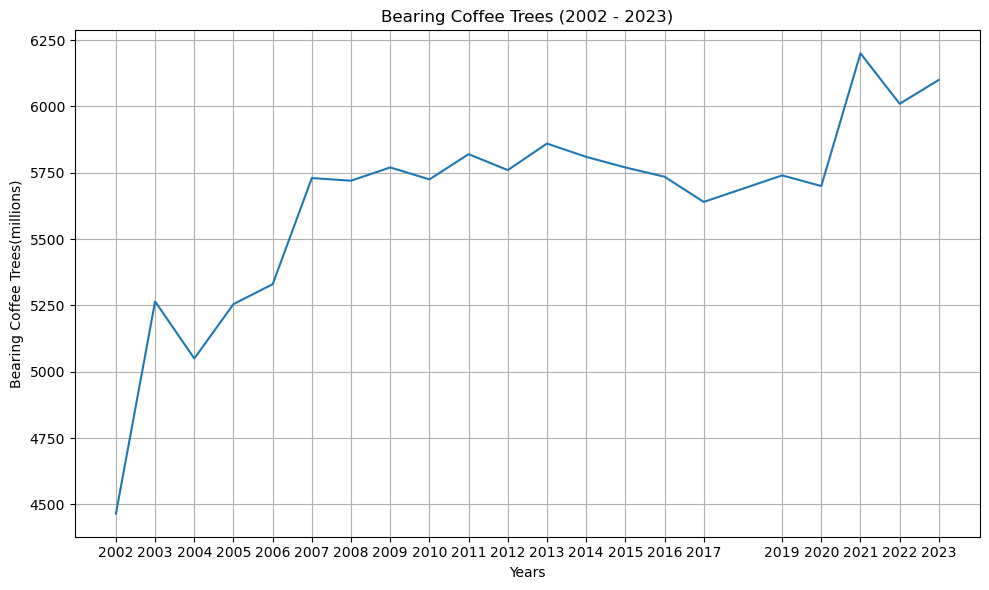

In [40]:
# plotting line gragh
plt.figure(figsize=(10, 6))
plt.xticks(Minas_coffee_df['year']) 
plt.plot(Minas_coffee_df['year'],Minas_coffee_df['bearing_trees'])

plt.xlabel('Years')
plt.ylabel('Bearing Coffee Trees(millions)')
plt.title('Bearing Coffee Trees (2002 - 2023)')
plt.grid(True)
plt.tight_layout()


To understand the distribution of coffee-bearing trees in the Minas Gerais subdivision, we plot a histogram of the bearing_trees column.

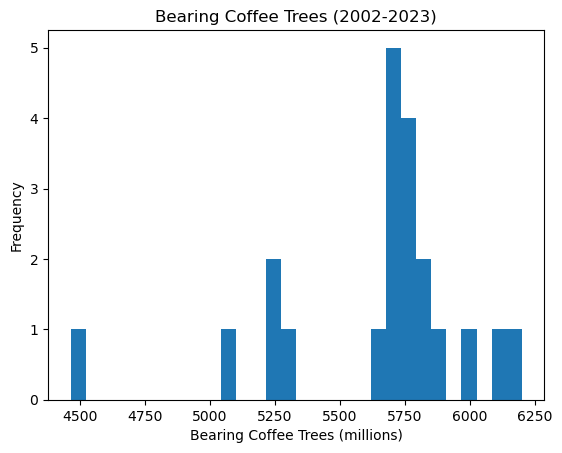

In [41]:
# plotting histogram
plt.hist(Minas_coffee_df['bearing_trees'], bins=30)
plt.title('Bearing Coffee Trees (2002-2023)')
plt.xlabel('Bearing Coffee Trees (millions)')
plt.ylabel('Frequency')
plt.show()


Answer:

Over the analyzed period, the amount of bearing coffee trees in Minas Gerais has shown a consistent upward trend. In 2002, the number of bearing trees was approximately 4500 million, and by 2023, this figure had increased to around 6100 million.

This indicates a steady growth in bearing trees over the years.

The distribution is slightly right skewed and not perfectly normal. Most of the observations are clustered around 5700–5900 trees. ie, recent years have generally higher numbers of bearing trees.



__________

#### Average Bearing Hectares by Year - Minas Gerais

How is bearing hectares changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?


In [42]:
#checking columns
Minas_coffee_df[['year','bearing_hectares']]

,year,bearing_hectares
0,2002,2120.0
5,2003,2360.0
10,2004,2174.0
15,2005,2305.0
20,2006,2298.0
25,2007,2245.0
30,2008,2235.0
35,2009,2223.0
40,2010,2151.0
45,2011,2175.0


#### DATA VISUALISATION 

Plotting a line graph using the year and bearing hectares columns, to visualize how the bearing hectares has changed over the years.

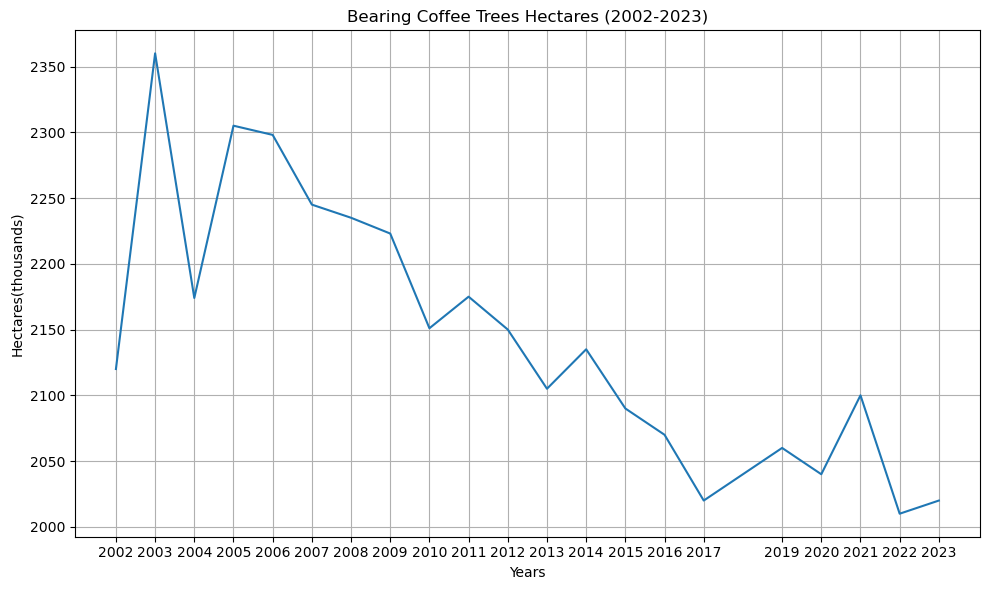

In [43]:
# plotting line graph
plt.figure(figsize=(10, 6))
plt.xticks(Minas_coffee_df['year']) 
plt.plot(Minas_coffee_df['year'],Minas_coffee_df['bearing_hectares'])

plt.xlabel('Years')
plt.ylabel('Hectares(thousands)')
plt.title('Bearing Coffee Trees Hectares (2002-2023)')
plt.grid(True)
plt.tight_layout()

To understand the distribution of coffee-bearing hectares in the Minas Gerais subdivision, we plot a histogram of the bearing hectares column.

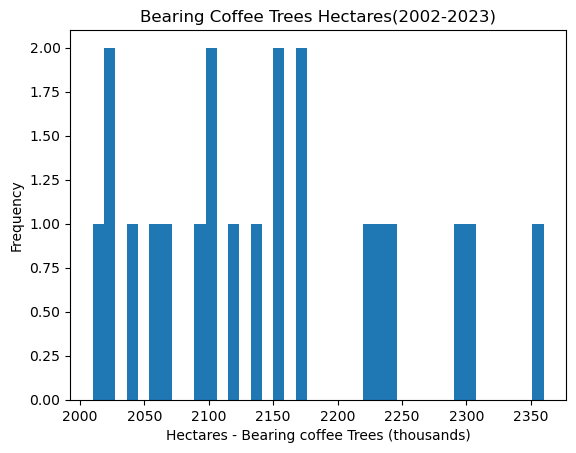

In [44]:
# plotting histogram
plt.hist(Minas_coffee_df['bearing_hectares'], bins=40)
plt.title('Bearing Coffee Trees Hectares(2002-2023)')
plt.xlabel('Hectares - Bearing coffee Trees (thousands)')
plt.ylabel('Frequency')
plt.show()


Answer:

The line plot of bearing hectares vs. years clearly shows a declining trend from 2002 to 2023. In 2003, the area peaked around 2,360 thousand hectares. After 2003, there was a gradual and steady decrease in the number of hectares used for bearing coffee trees. By 2023, the area declined to around 2,010 thousand hectares. Although there are some small fluctuations (minor rises and falls in certain years like 2005, 2010, and 2020), the overall pattern is downward.

The distribution of hectare values is slightly left-skewed, with most of the data concentrated between 2000 and 2180 thousand hectares. Although minor fluctuations are observed in some years, the overall pattern reflects a persistent reduction in the area used for bearing coffee trees over the last two decades.
The distribution does not follow a perfect normal distribution curve.


____________

####  60kgs_bag by Year - Minas Gerais

How is the count of million 60kgs bags of coffee changing across the years for Minas Gerais? Is this increasing or decreasing? What is the distribution of this variable? Is it normal?

In [45]:
# checking columns
Minas_coffee_df[['year','60kgs_bag']]

,year,60kgs_bag
0,2002,16.20
5,2003,26.70
10,2004,14.40
15,2005,21.40
20,2006,16.30
25,2007,23.70
30,2008,16.85
35,2009,25.55
40,2010,22.10
45,2011,28.50


#### DATA VISUALISATION

Plotting a line graph using the year and 60kgs_bag columns, to visualize how the coffee harvested has changed over the years.

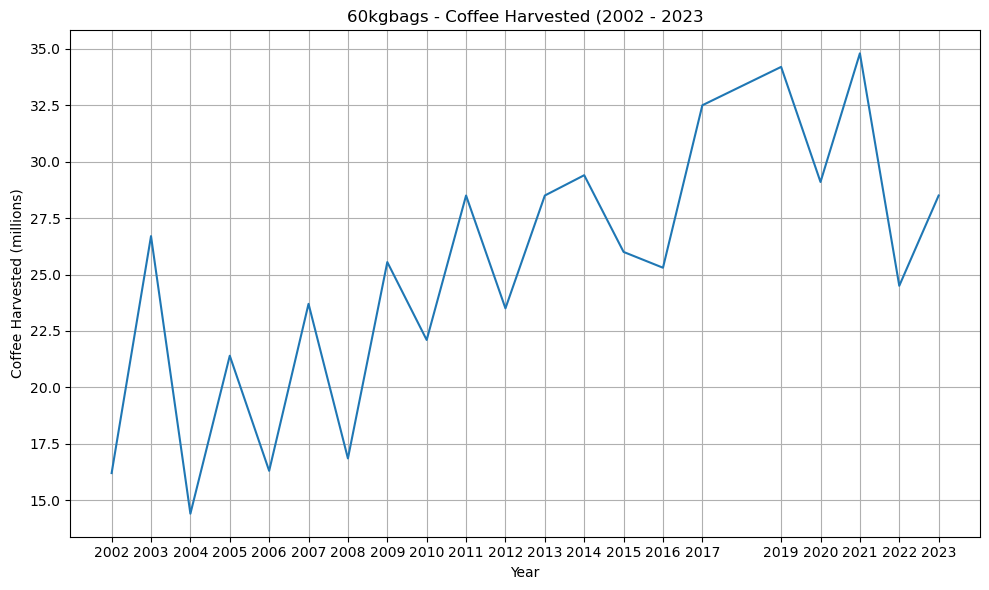

In [46]:
# plotting line graph 
plt.figure(figsize=(10, 6))
plt.xticks(Minas_coffee_df['year']) 
plt.plot(Minas_coffee_df['year'],Minas_coffee_df['60kgs_bag'])

plt.xlabel('Year')
plt.ylabel('Coffee Harvested (millions)')
plt.title('60kgbags - Coffee Harvested (2002 - 2023')
plt.grid(True)
plt.tight_layout()

To understand the distribution of coffee harvested in the Minas Gerais subdivision, we plot a histogram of the 60kgs_bags column.

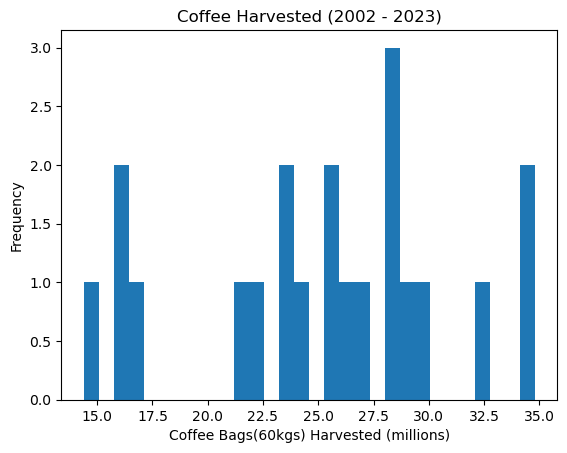

In [47]:
# Plotting histogram
plt.hist(Minas_coffee_df['60kgs_bag'], bins=30)
plt.title('Coffee Harvested (2002 - 2023)')
plt.xlabel('Coffee Bags(60kgs) Harvested (millions)')
plt.ylabel('Frequency')
plt.show()


Answer:

The line plot shows an overall increasing trend in the number of 60kg coffee bags harvested from 2002 to 2023. The pattern shows cyclical fluctuations, some years have higher outputs, followed by slight dips, but the general direction is upward.
The distribution of harvest counts is not perfectly normal.


_________

#### Correlation Between Bearing Trees and Coffee Harvested

What is the relationship between bearing_trees and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.


In [48]:
# checking columns
Minas_coffee_df[['bearing_trees','60kgs_bag']]

,bearing_trees,60kgs_bag
0,4465.0,16.20
5,5265.0,26.70
10,5050.0,14.40
15,5255.0,21.40
20,5330.0,16.30
25,5730.0,23.70
30,5720.0,16.85
35,5770.0,25.55
40,5725.0,22.10
45,5820.0,28.50


To explore the relationship between the number of bearing trees and coffee yield, we calculate the correlation between bearing_trees and 60kgs_bag.

In [49]:
# checking correlations
Minas_coffee_df[['bearing_trees','60kgs_bag']].corr()

,bearing_trees,60kgs_bag
bearing_trees,1.000000,0.655343
60kgs_bag,0.655343,1.000000


To visualize the relationship between the number of bearing trees and coffee production, we plot a scatterplot with bearing_trees on the x-axis and 60kgs_bag on the y-axis.

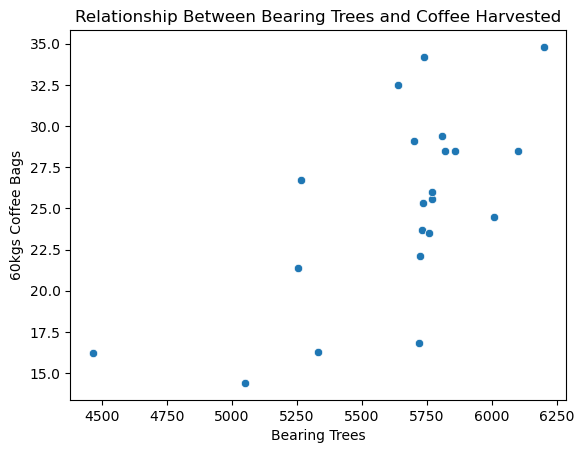

In [51]:
# plotting scatter plot
sns.scatterplot(x = Minas_coffee_df['bearing_trees'], y = Minas_coffee_df['60kgs_bag'])

plt.title('Relationship Between Bearing Trees and Coffee Harvested')
plt.xlabel('Bearing Trees')
plt.ylabel('60kgs Coffee Bags')
plt.show()

Answer:

There is a moderately strong positive relationship between amount of bearing coffee trees and the number of 60kg bags harvested in Minas Gerais, with a Pearson correlation coefficient of 0.655. This suggests that higher numbers of bearing trees generally support higher coffee production, although other influencing factors are likely present.


_____________________________________________________

##### Correlation Between Bearing Hectares and Coffee Produced

What is the relationship between bearing_hectares and 60kgs_bag? How *strong* is this relationship? Use pearson's correlation coefficient.

To explore the relationship between the  bearing hectares and coffee yield, we calculate the correlation between bearing_hectares and 60kgs_bag.

In [ ]:
# finding pearson's correlation coefficient 
Minas_coffee_df[['bearing_hectares','60kgs_bag']].corr()

,bearing_hectares,60kgs_bag
bearing_hectares,1.00000,-0.48092
60kgs_bag,-0.48092,1.00000


To understand how Coffee produced and bearing hectares are related, we plot a scatterplot using the 60kgs_bags and bearing_hectares columns.

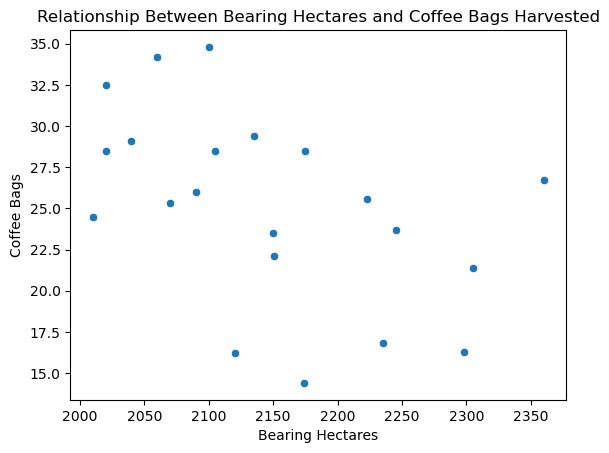

In [54]:
# Plotting scatter plot
sns.scatterplot(x = Minas_coffee_df['bearing_hectares'], y = Minas_coffee_df['60kgs_bag'])


plt.title('Relationship Between Bearing Hectares and Coffee Bags Harvested')
plt.xlabel('Bearing Hectares')
plt.ylabel('Coffee Bags')
plt.show()

Answer:

There is a moderate negative relationship between bearing hectares and the number of 60kg bags harvested in Minas Gerais, with a Pearson correlation coefficient of -0.481.
The scatter plot shows a somewhat downward trend, although the relationship is not perfectly linear.
This inverse pattern suggests that simply having more land under production doesn't necessarily lead to higher yields, it may reflect inefficiencies in large scale productions.

_________________